# Results

In [3]:
from cama.utils import evaluate_answers_with_unknowns
import json
from cama.utils import load_from_json
import pandas as pd

# llm_name = "llama-3.2-1b-preview"
llm_name = "llama3-8b-8192"
# llm_name = "llama3-70b-8192"
# llm_name = "gpt-4o-mini"



dataset_folder = "datasets/financial" # easy
# dataset_folder = "datasets/eligibility" #medium dataset
# dataset_folder = "datasets/healthcare" # difficult dataset


qa_list = load_from_json(f'{dataset_folder}/qa_list.json')
methods = ["cama", "full_prompt", "full_prompt_cot", "reflection", "react", "self_discover", "plan_and_execute"]
results = {}

for method in methods:
    answers_method_filename = f'{dataset_folder}/answers_{method}_{llm_name}.json'
    answers = load_from_json(answers_method_filename)
    # read metadata
    metadata_filename = f'{dataset_folder}/metadata_{method}_{llm_name}.json'
    with open(metadata_filename, 'r') as f:
        metadata = json.load(f)

    accuracy_score, unknown_ratio = evaluate_answers_with_unknowns(qa_list, answers)
    results[method] = {
        "accuracy_score": accuracy_score,
        "unknown_ratio": unknown_ratio,
        "metadata": metadata
    }


data = []

for method, metrics in results.items():
    row = {
        "method": method,
        "accuracy_score": metrics["accuracy_score"],
        "unknown_ratio": metrics["unknown_ratio"],
        "total_tokens": metrics["metadata"]["total_tokens"],
        "elapsed_time": metrics["metadata"]["elapsed_time"]
    }
    data.append(row)

# Create the dataframe
df = pd.DataFrame(data)

df

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_react_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

,method,accuracy_score,unknown_ratio,total_tokens,elapsed_time
0,cama,87.179487,0.000000,24233,5.075975
1,full_prompt,30.769231,69.230769,4846,1.206754
2,full_prompt_cot,38.461538,61.538462,4846,1.190980
3,reflection,48.717949,48.717949,13781,4.175666
4,react,7.692308,92.307692,4321,2.468150
5,self_discover,46.153846,51.282051,24552,5.748410
6,plan_and_execute,69.230769,23.076923,37304,15.169253


# Radar plot

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_react_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_react_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_full_prompt_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_full_prompt_cot_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_reflection_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_react_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_self_discover_gpt-4o-mini.json object loaded successfully

datasets/financial/answers_plan_and_execute_gpt-4o-mini.json object loaded successfully

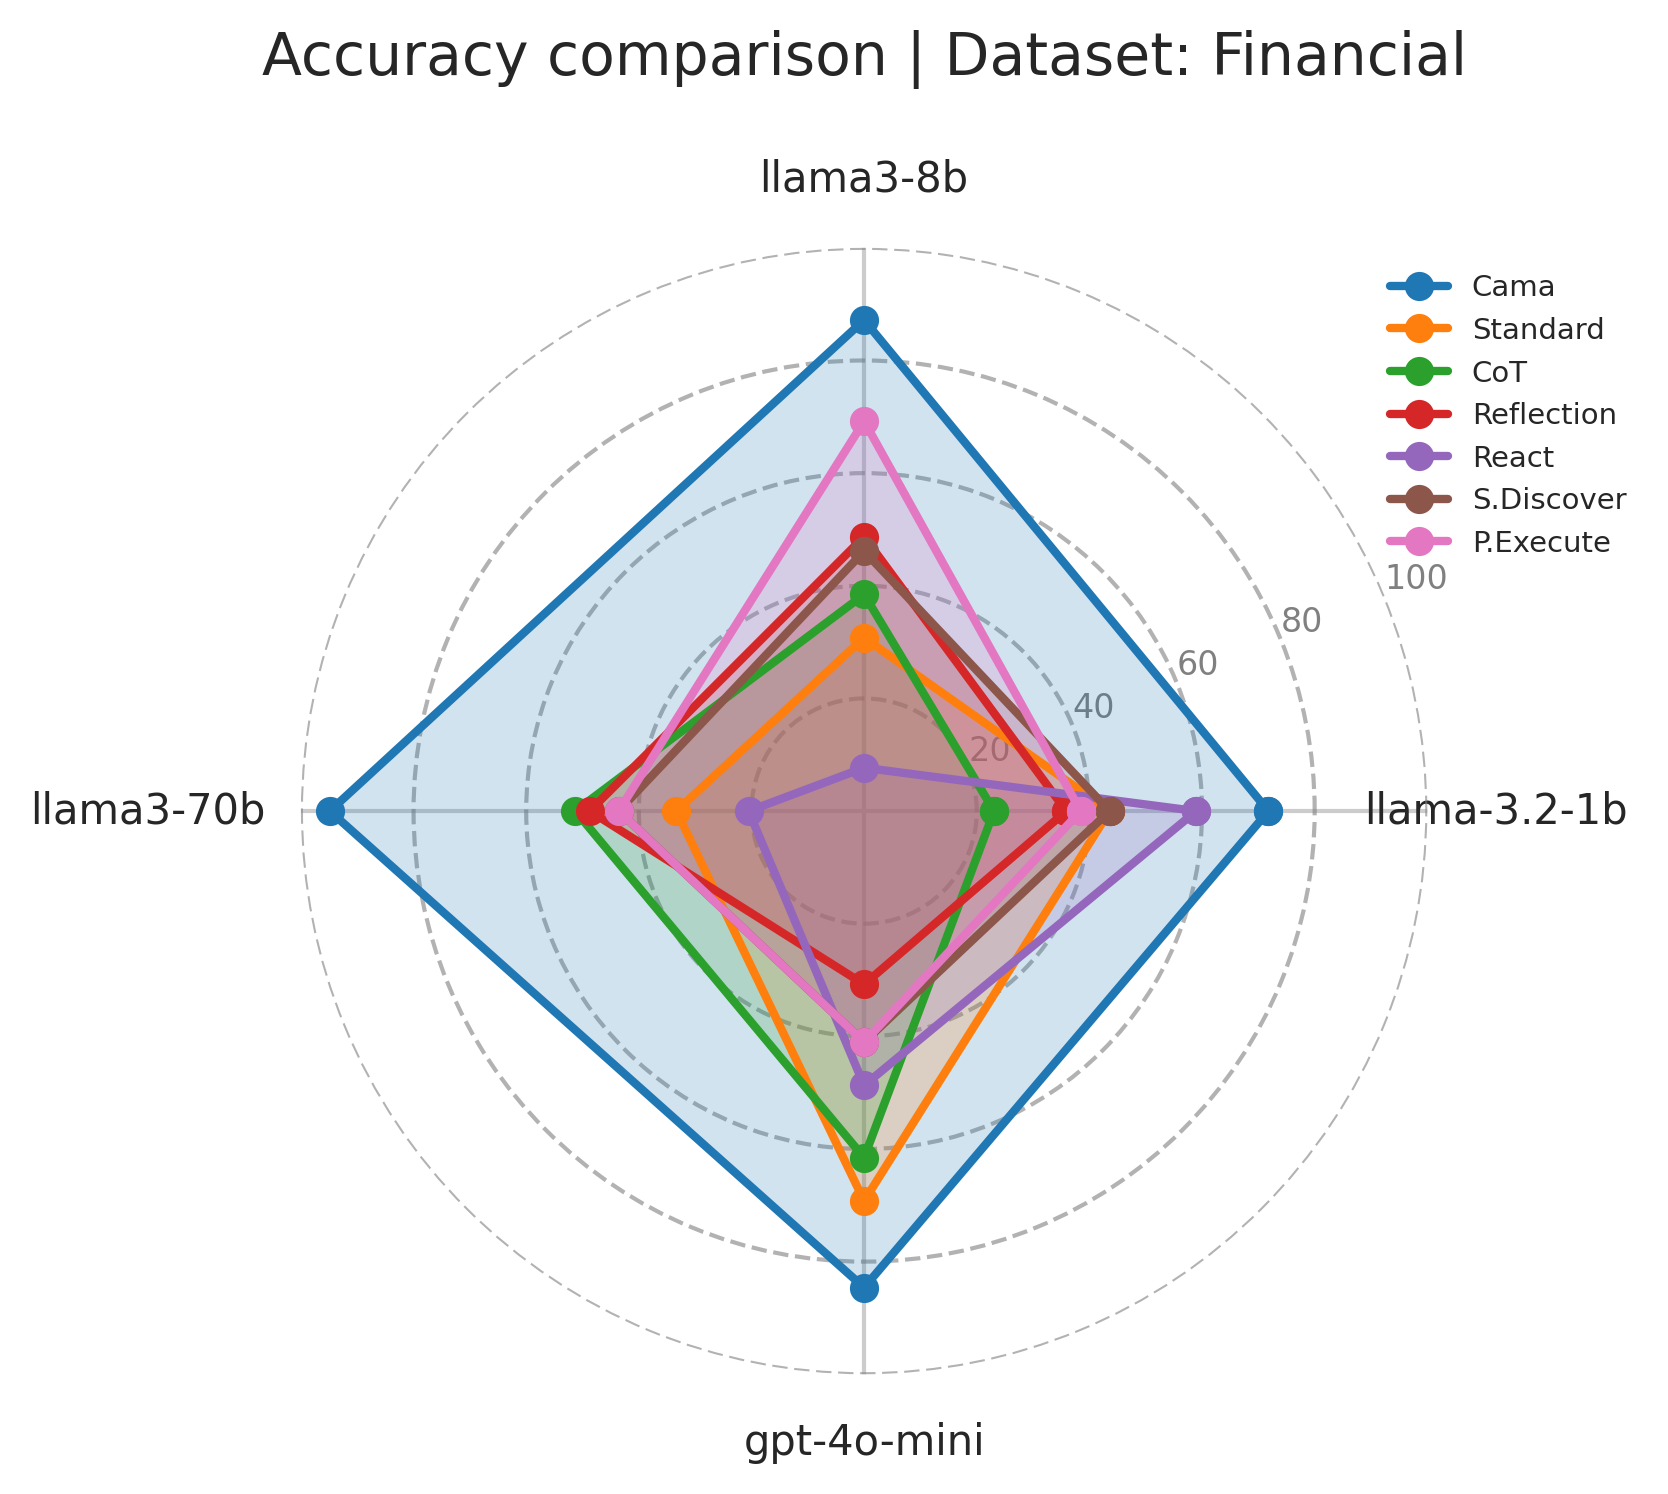

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import json
from cama.utils import evaluate_answers_with_unknowns, load_from_json

def generate_radar_plot_with_improvements(dataset_folder, llm_names):
    # Model and method mappings
    model_mapping = {
        "llama-3.2-1b-preview": "llama-3.2-1b",
        "llama3-8b-8192": "llama3-8b",
        "llama3-70b-8192": "llama3-70b",
        "gpt-4o-mini": "gpt-4o-mini"
    }

    method_mapping = {
        "cama": "Cama",
        "full_prompt": "Standard",
        "full_prompt_cot": "CoT",
        "reflection": "Reflection",
        "react": "React",
        "self_discover": "S.Discover",
        "plan_and_execute": "P.Execute"
    }

    # Prepare an empty dictionary to hold results for each LLM
    results = {}

    methods = list(method_mapping.keys())

    for llm_name in llm_names:
        # For each LLM, calculate metrics for all methods
        qa_list = load_from_json(f'{dataset_folder}/qa_list.json')
        model_results = {}

        for method in methods:
            answers_method_filename = f'{dataset_folder}/answers_{method}_{llm_name}.json'
            answers = load_from_json(answers_method_filename)

            # Read metadata
            metadata_filename = f'{dataset_folder}/metadata_{method}_{llm_name}.json'
            with open(metadata_filename, 'r') as f:
                metadata = json.load(f)

            accuracy_score, unknown_ratio = evaluate_answers_with_unknowns(qa_list, answers)
            model_results[method] = {
                "accuracy_score": accuracy_score,
                "unknown_ratio": unknown_ratio,
                "total_tokens": metadata["total_tokens"],
                "elapsed_time": metadata["elapsed_time"]
            }

        results[llm_name] = model_results

    # Create a radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=300)

    # Define labels (models) for the axes and the number of variables
    models = [model_mapping[llm_name] for llm_name in llm_names]  # Apply model mapping
    num_vars = len(models)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Define the colors for each method
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    # Plot for each method across models with filled area
    for i, method in enumerate(methods):
        method_scores = [results[llm_name][method]["accuracy_score"] for llm_name in llm_names]
        method_scores += method_scores[:1]  # Complete the loop
        
        # Plot the data for this method
        ax.plot(angles, method_scores, label=method_mapping[method], color=colors[i], linewidth=2, marker='o')
        
        # Fill the area under the line with transparency
        ax.fill(angles, method_scores, color=colors[i], alpha=0.2)

    # Add labels for each model (axes) and adjust the positions to avoid overlap
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(models, fontsize=10)

    # Adjust the position of the "llama3-70b" label to avoid overlap with the blue line
    labels = ax.get_xticklabels()
    labels[2].set_y(-0.15)  # Move llama3-70b slightly down

    # Set radial labels (values)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=8, color='grey')
    ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.6)

    # Remove unnecessary details for a cleaner look
    ax.spines['polar'].set_visible(False)

    # Add title and legend, including the dataset number and accuracy metric
    dataset_name = dataset_folder.split('/')[1].capitalize()
    ax.set_title(f"Accuracy comparison | Dataset: {dataset_name}", fontsize=14, pad=20)

    # Place the legend outside the plot
    ax.legend(loc='best', bbox_to_anchor=(1.2, 1), fontsize=7, frameon=False)

    # Display the plot
    plt.tight_layout()
    plt.savefig(f"radar_plot_{dataset_name}.pdf", bbox_inches='tight', pad_inches=0)
    plt.show()

# Example usage:
dataset_folder = "datasets/financial"
# dataset_folder = "datasets/eligibility"
# dataset_folder = "datasets/healthcare"
llm_names = ["llama-3.2-1b-preview", "llama3-8b-8192", "llama3-70b-8192", "gpt-4o-mini"]

# Pass dataset number for the title
generate_radar_plot_with_improvements(dataset_folder, llm_names)


# Average table of results

In [64]:
import pandas as pd
import numpy as np
import json
from tabulate import tabulate
from cama.utils import evaluate_answers_with_unknowns, load_from_json

def process_llm_results(llm_name, dataset_folder, methods):
    results = {}
    for method in methods:
        try:
            answers_method_filename = f'{dataset_folder}/answers_{method}_{llm_name}.json'
            qa_list_filename = f'{dataset_folder}/qa_list.json'
            metadata_filename = f'{dataset_folder}/metadata_{method}_{llm_name}.json'
            
            qa_list = load_from_json(qa_list_filename)
            answers = load_from_json(answers_method_filename)
            with open(metadata_filename, 'r') as f:
                metadata = json.load(f)
            
            accuracy_score, unknown_ratio = evaluate_answers_with_unknowns(qa_list, answers)
            results[method] = {
                "Accuracy (↑)": round(accuracy_score, 1),
                "Unknown (↓)": round(unknown_ratio, 1),
                "Tokens (↓)": round(metadata["total_tokens"] / 1000, 1),
                "Time (↓)": round(metadata["elapsed_time"], 1)
            }
        except FileNotFoundError:
            results[method] = {
                "Accuracy (↑)": "--",
                "Unknown (↓)": "--",
                "Tokens (↓)": "--",
                "Time (↓)": "--"
            }
    return results

def bold_best_values(results):
    metrics = ["Accuracy (↑)", "Unknown (↓)", "Tokens (↓)", "Time (↓)"]
    for metric in metrics:
        values = [results[method][metric] for method in results if results[method][metric] != "--"]
        if values:
            best_value = max(values) if metric == "Accuracy (↑)" else min(values)
            for method in results:
                if results[method][metric] == best_value:
                    results[method][metric] = f"\\textbf{{{results[method][metric]}}}"
    return results

def create_latex_table(results, caption, dataset_description=None):
    models = list(results.keys())
    method_mapping = {
        "cama": "Cama",
        "full_prompt": "Standard",
        "full_prompt_cot": "CoT",
        "reflection": "Reflection",
        "react": "React",
        "self_discover": "S.Discover",
        "plan_and_execute": "P.Execute"
    }
    methods = [method_mapping[m] for m in results[models[0]].keys()]
    metrics = ["Accuracy (↑)", "Unknown (↓)", "Tokens (↓)", "Time (↓)"]
    
    model_mapping = {
        "llama-3.2-1b-preview": "llama-3.2-1b",
        "llama3-8b-8192": "llama3-8b",
        "llama3-70b-8192": "llama3-70b",
        "gpt-4o-mini": "gpt-4o-mini"
    }
    
    latex_lines = [
        "\\begin{table*}[htbp]",
        "\\centering",
        f"\\caption{{{caption}}}"
    ]
    if dataset_description:
        latex_lines.append(f"\\textbf{{Note:}} {dataset_description}")
    latex_lines.extend([
        "\\label{tab:llm-comparison}",
        "\\resizebox{\\textwidth}{!}{%",
        "\\begin{tabular}{llccccccc}",
        "\\toprule",
        "\\textbf{Model} & \\textbf{Metric} & " + " & ".join([f"\\textbf{{{method}}}" for method in methods]) + " \\\\"
    ])
    
    for model in models:
        latex_lines.append("\\midrule")
        bolded_results = bold_best_values(results[model])
        for i, metric in enumerate(metrics):
            if i == 0:
                latex_lines.append(f"\\multirow{{4}}{{*}}{{\\textbf{{{model_mapping[model]}}}}} ")
            else:
                latex_lines.append(" ")
            latex_lines[-1] += f"& \\textbf{{{metric}}} & " + " & ".join(str(bolded_results[old_method][metric]) for old_method in method_mapping.keys()) + " \\\\"
    
    latex_lines.extend([
        "\\bottomrule",
        "\\end{tabular}",
        "}",
        "\\end{table*}"
    ])
    
    return "\n".join(latex_lines)

def strip_latex_bold(value):
    if isinstance(value, str):
        return value.replace('\\textbf{', '').replace('}', '')
    return value

def calculate_mean_and_error(values):
    if len(values) > 1:
        mean = np.mean(values)
        std_error = np.std(values, ddof=1) / np.sqrt(len(values))
        return f"{round(mean, 1)} ± {round(std_error, 1)}"
    elif len(values) == 1:
        return f"{round(values[0], 1)}"
    else:
        return "--"

# Define datasets, LLMs, and methods
dataset_folders = {
    "financial": "datasets/financial",
    "eligibility": "datasets/eligibility",
    "healthcare": "datasets/healthcare"
}
dataset_descriptions = {
    "financial": "The financial dataset represents an easy difficulty level.",
    "eligibility": "The eligibility dataset represents a medium difficulty level.",
    "healthcare": "The healthcare dataset represents a difficult level."
}
llm_names = ["llama-3.2-1b-preview", "llama3-8b-8192", "llama3-70b-8192", "gpt-4o-mini"]
methods = ["cama", "full_prompt", "full_prompt_cot", "reflection", "react", "self_discover", "plan_and_execute"]

# Process results for each dataset and LLM
all_datasets_results = {}
for dataset_name, dataset_folder in dataset_folders.items():
    all_results = {}
    for llm_name in llm_names:
        all_results[llm_name] = process_llm_results(llm_name, dataset_folder, methods)
    all_datasets_results[dataset_name] = all_results

    # Create and print LaTeX table for individual dataset
    caption = f"Performance Comparison Across Different LLMs and Methods for {dataset_name.capitalize()} Dataset"
    latex_table = create_latex_table(all_results, caption, dataset_descriptions[dataset_name])
    print(f"\nLaTeX Table for {dataset_name.capitalize()} Dataset:")
    print(latex_table)

    # Print a readable version to console for individual dataset
    print(f"\nReadable Version for {dataset_name.capitalize()} Dataset:")
    method_mapping = {
        "cama": "Cama",
        "full_prompt": "Standard",
        "full_prompt_cot": "CoT",
        "reflection": "Reflection",
        "react": "React",
        "self_discover": "Self Discover",
        "plan_and_execute": "Plan and Execute"
    }
    model_mapping = {
        "llama-3.2-1b-preview": "llama-3.2-1b",
        "llama3-8b-8192": "llama3-8b",
        "llama3-70b-8192": "llama3-70b",
        "gpt-4o-mini": "gpt-4o-mini"
    }
    for llm_name, results in all_results.items():
        print(f"\n{model_mapping[llm_name]}:")
        df = pd.DataFrame({method_mapping[k]: v for k, v in results.items()}).T
        print(tabulate(df, headers='keys', tablefmt='pretty'))

# Calculate average results across all datasets
average_results = {}
for llm_name in llm_names:
    average_results[llm_name] = {}
    for method in methods:
        average_results[llm_name][method] = {}
        for metric in ["Accuracy (↑)", "Unknown (↓)", "Tokens (↓)", "Time (↓)"]:
            values = [all_datasets_results[dataset][llm_name][method][metric] 
                      for dataset in dataset_folders.keys() 
                      if all_datasets_results[dataset][llm_name][method][metric] != "--"]
            if values:
                cleaned_values = [float(strip_latex_bold(v)) for v in values]
                average_results[llm_name][method][metric] = calculate_mean_and_error(cleaned_values)
            else:
                average_results[llm_name][method][metric] = "--"

# Create and print LaTeX table for average results
caption = "Average Performance Comparison Across All Datasets"
latex_table = create_latex_table(average_results, caption)
print("\nLaTeX Table for Average Results Across All Datasets:")
print(latex_table)

# Print a readable version of average results to console
print("\nReadable Version for Average Results Across All Datasets:")
for llm_name, results in average_results.items():
    print(f"\n{model_mapping[llm_name]}:")
    df = pd.DataFrame({method_mapping[k]: v for k, v in results.items()}).T
    print(tabulate(df, headers='keys', tablefmt='pretty'))

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_react_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_react_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_cot_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_reflection_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_react_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_self_discover_gpt-4o-mini.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_plan_and_execute_gpt-4o-mini.json object loaded successfully


LaTeX Table for Financial Dataset:
\begin{table*}[htbp]
\centering
\caption{Performance Comparison Across Different LLMs and Methods for Financial Dataset}
\textbf{Note:} The financial dataset represents an easy difficulty level.
\label{tab:llm-comparison}
\resizebox{\textwidth}{!}{%
\begin{tabular}{llccccccc}
\toprule
\textbf{Model} & \textbf{Metric} & \textbf{Cama} & \textbf{Standard} & \textbf{CoT} & \textbf{Reflection} & \textbf{React} & \textbf{S.Discover} & \textbf{P.Execute} \\
\midrule
\multirow{4}{*}{\textbf{llama-3.2-1b}} & \textbf{Accuracy (↑)} & \textbf{71.8} & 43.6 & 23.1 & 35.9 & 59.0 & 43.6 & 38.5 \\
 & \textbf{Unknown (↓)} & \textbf{25.6} & 56.4 & 76.9 & 53.8 & 33.3 & 53.8 & 61.5 \\
 & \textbf{Tokens (↓)} & 28.1 & 5.2 & 4.8 & 13.8 & \textbf{4.3} & 18.2 & 37.3 \\
 & \textbf{Time (↓)} & 6.2 & \textbf{1.2} & 1.9 & 4.2 & 2.5 & 5.6 & 43.4 \\
\midrule
\multirow{4}{*}{\textbf{llama3-8b}} & \textbf{Accuracy (↑)} & \textbf{87.2} & 30.8 & 38.5 & 48.7 & 7.7 & 46.2 & 69.2 \\
 & \t

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_react_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_react_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_reflection_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_react_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_self_discover_gpt-4o-mini.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_gpt-4o-mini.json object loaded successfully


LaTeX Table for Eligibility Dataset:
\begin{table*}[htbp]
\centering
\caption{Performance Comparison Across Different LLMs and Methods for Eligibility Dataset}
\textbf{Note:} The eligibility dataset represents a medium difficulty level.
\label{tab:llm-comparison}
\resizebox{\textwidth}{!}{%
\begin{tabular}{llccccccc}
\toprule
\textbf{Model} & \textbf{Metric} & \textbf{Cama} & \textbf{Standard} & \textbf{CoT} & \textbf{Reflection} & \textbf{React} & \textbf{S.Discover} & \textbf{P.Execute} \\
\midrule
\multirow{4}{*}{\textbf{llama-3.2-1b}} & \textbf{Accuracy (↑)} & \textbf{46.2} & 0.0 & 7.7 & 15.4 & 0.0 & 15.4 & 15.4 \\
 & \textbf{Unknown (↓)} & \textbf{38.5} & 100.0 & 92.3 & 84.6 & 100.0 & 84.6 & 84.6 \\
 & \textbf{Tokens (↓)} & 14.8 & 5.0 & \textbf{2.2} & 15.2 & 33.2 & 15.9 & 19.7 \\
 & \textbf{Time (↓)} & 5.0 & \textbf{0.6} & 1.3 & 2.7 & 80.7 & 88.2 & 45.6 \\
\midrule
\multirow{4}{*}{\textbf{llama3-8b}} & \textbf{Accuracy (↑)} & \textbf{94.9} & 15.4 & 0.0 & 7.7 & 5.1 & 2.6 & 51.3 \\

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_react_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_react_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_reflection_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_react_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_self_discover_gpt-4o-mini.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_gpt-4o-mini.json object loaded successfully


LaTeX Table for Healthcare Dataset:
\begin{table*}[htbp]
\centering
\caption{Performance Comparison Across Different LLMs and Methods for Healthcare Dataset}
\textbf{Note:} The healthcare dataset represents a difficult level.
\label{tab:llm-comparison}
\resizebox{\textwidth}{!}{%
\begin{tabular}{llccccccc}
\toprule
\textbf{Model} & \textbf{Metric} & \textbf{Cama} & \textbf{Standard} & \textbf{CoT} & \textbf{Reflection} & \textbf{React} & \textbf{S.Discover} & \textbf{P.Execute} \\
\midrule
\multirow{4}{*}{\textbf{llama-3.2-1b}} & \textbf{Accuracy (↑)} & \textbf{48.7} & 25.6 & 10.3 & 23.1 & 23.1 & 5.1 & 5.1 \\
 & \textbf{Unknown (↓)} & \textbf{43.6} & 74.4 & 87.2 & 71.8 & 74.4 & 94.9 & 94.9 \\
 & \textbf{Tokens (↓)} & 31.9 & \textbf{4.5} & \textbf{4.5} & 13.5 & 33.2 & 17.9 & 14.1 \\
 & \textbf{Time (↓)} & 5.7 & \textbf{2.7} & \textbf{2.7} & 52.1 & 22.3 & 89.2 & 50.7 \\
\midrule
\multirow{4}{*}{\textbf{llama3-8b}} & \textbf{Accuracy (↑)} & \textbf{89.7} & 38.5 & 20.5 & 28.2 & 15.4 & 17.

# Radar plot

# Lines

datasets/financial/qa_list.json object loaded successfully

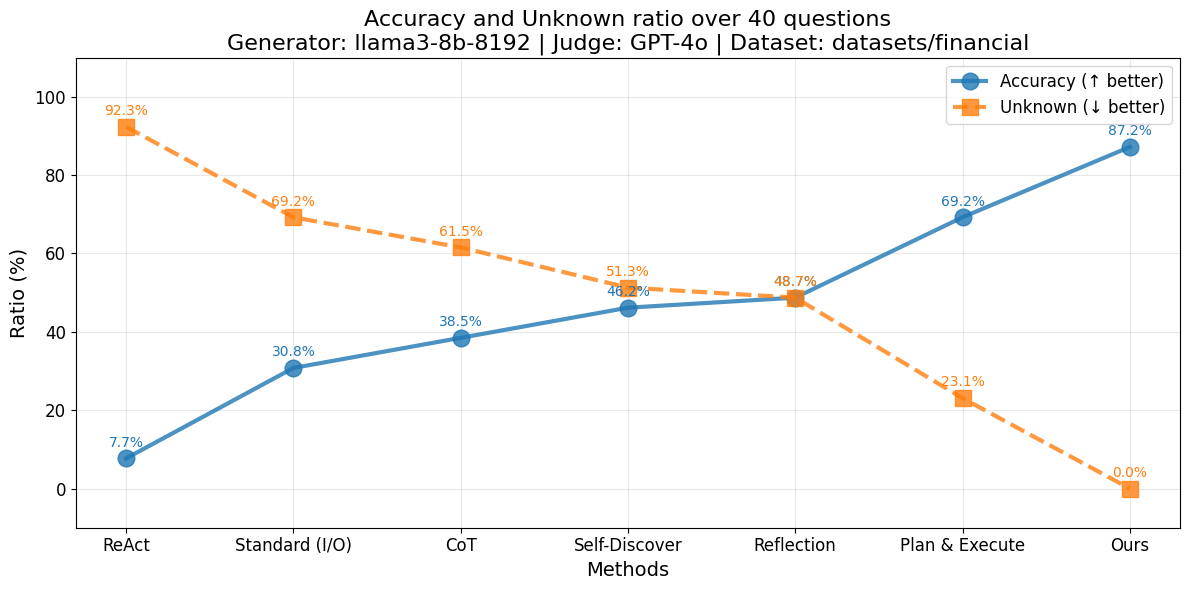

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Tuple
from cama.utils import evaluate_answers_with_unknowns

# load qa list
qa_list = load_from_json(f'{dataset_folder}/qa_list.json')

def plot_scores_with_unknowns(scores: Dict[str, Tuple[float, float]], llm_name: str):
    """
    Creates a single line plot showing both accuracy scores and unknown ratios.

    Parameters:
    scores (Dict[str, Tuple[float, float]]): A dictionary where keys are method names and values are tuples (accuracy, unknown_ratio).
    llm_name (str): The name of the language model used as the report generator.
    """
    methods = list(scores.keys())
    accuracies = [score[0] for score in scores.values()]
    unknown_ratios = [score[1] for score in scores.values()]

    # Sort methods by accuracy for better visual trend
    sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k])
    methods = [methods[i] for i in sorted_indices]
    accuracies = [accuracies[i] for i in sorted_indices]
    unknown_ratios = [unknown_ratios[i] for i in sorted_indices]

    plt.figure(figsize=(12, 6))

    # Plot both lines on the same graph
    plt.plot(methods, accuracies, marker='o', linewidth=3, color='#1f77b4', markersize=12, label='Accuracy (↑ better)', alpha=0.8)
    plt.plot(methods, unknown_ratios, marker='s', linewidth=3, color='#ff7f0e', markersize=12, label='Unknown (↓ better)', alpha=0.8, linestyle='--')
    
    # Highlight CAMA with different markers
    # cama_index = methods.index("CAMA") if "CAMA" in methods else -1
    # if cama_index != -1:
    #     plt.plot(cama_index, accuracies[cama_index], marker='*', markersize=20, color='#1f77b4', label='CAMA (Acc)', linewidth=0)
    #     plt.plot(cama_index, unknown_ratios[cama_index], marker='P', markersize=20, color='#ff7f0e', label='CAMA (Unk)', linewidth=0)
    
    plt.ylim(-10, 110)
    plt.xlabel('Methods', fontsize=14)
    plt.ylabel('Ratio (%)', fontsize=14)
    plt.title(f'Accuracy and Unknown ratio over 40 questions\nGenerator: {llm_name} | Judge: GPT-4o | Dataset: {dataset_folder}', fontsize=16)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # # Create a custom legend order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0, 1]  # Accuracy, Unknown
    # if cama_index != -1:
    #     order.extend([2, 3])  # CAMA (Acc), CAMA (Unk)
    plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12)

    # Add value labels on each point with offset for better readability
    for i, (acc, unk) in enumerate(zip(accuracies, unknown_ratios)):
        # if acc > unk:
        plt.text(i, acc + 3, f'{acc:.1f}%', ha='center', fontsize=10, color='#1f77b4')
        plt.text(i, unk + 3, f'{unk:.1f}%', ha='center', fontsize=10, color='#ff7f0e')
        # else:
        #     plt.text(i, acc - 2, f'{acc:.1f}%', ha='center', fontsize=10, color='#1f77b4')
        #     plt.text(i, unk + 2, f'{unk:.1f}%', ha='center', fontsize=10, color='#ff7f0e')

    # save plot in pdf
    # plt.savefig(f'{dataset_folder}/scores_plot_{llm_name}.pdf', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Example usage:
scores = {
    "Standard (I/O)": (results['full_prompt']['accuracy_score'], results['full_prompt']['unknown_ratio']),
    "CoT": (results['full_prompt_cot']['accuracy_score'], results['full_prompt_cot']['unknown_ratio']),
    "Ours": (results['cama']['accuracy_score'], results['cama']['unknown_ratio']),
    "Reflection": (results['reflection']['accuracy_score'], results['reflection']['unknown_ratio']),
    "ReAct": (results['react']['accuracy_score'], results['react']['unknown_ratio']),
    "Self-Discover": (results['self_discover']['accuracy_score'], results['self_discover']['unknown_ratio']),
    "Plan & Execute": (results['plan_and_execute']['accuracy_score'], results['plan_and_execute']['unknown_ratio'])
}

plot_scores_with_unknowns(scores, llm_name)

# Plot 

In [47]:
import json
import pandas as pd
import numpy as np
from cama.utils import evaluate_answers_with_unknowns, load_from_json

# List of datasets and LLM names
datasets = ["financial", "eligibility", "healthcare"]
methods = ["cama", "full_prompt", "full_prompt_cot", "reflection", "react", "self_discover", "plan_and_execute"]

# Dictionary to store results across all datasets for both llama3-8b and llama3-70b
all_results = {"llama3.2-1b": {method: [] for method in methods},
                "llama3-8b": {method: [] for method in methods},
               "llama3-70b": {method: [] for method in methods}}

# Mapping of full LLM names to short keys for the dictionary
llm_name_mapping = {
    "llama-3.2-1b-preview": "llama3.2-1b",
    "llama3-8b-8192": "llama3-8b",
    "llama3-70b-8192": "llama3-70b"
}

# Loop through each dataset for both LLMs
llm_names = ["llama-3.2-1b-preview", "llama3-8b-8192", "llama3-70b-8192"]
for llm_name in llm_names:
    for dataset_folder in datasets:
        # Load the question-answer list
        qa_list = load_from_json(f'datasets/{dataset_folder}/qa_list.json')

        for method in methods:
            answers_method_filename = f'datasets/{dataset_folder}/answers_{method}_{llm_name}.json'
            answers = load_from_json(answers_method_filename)

            # Load metadata
            metadata_filename = f'datasets/{dataset_folder}/metadata_{method}_{llm_name}.json'
            with open(metadata_filename, 'r') as f:
                metadata = json.load(f)

            # Calculate accuracy and unknown ratio
            accuracy_score, unknown_ratio = evaluate_answers_with_unknowns(qa_list, answers)

            # Ensure correct types for numeric values
            all_results[llm_name_mapping[llm_name]][method].append({
                "accuracy_score": float(accuracy_score),
                "unknown_ratio": float(unknown_ratio),
                "total_tokens": int(metadata["total_tokens"]),
                "elapsed_time": float(metadata["elapsed_time"])
            })

# Prepare final data to reshape into the desired format
reshaped_data = []
min_data = []

for llm in ["llama3.2-1b", "llama3-8b", "llama3-70b"]:
    row = {"LLM": llm}
    for method in methods:
        results = all_results[llm][method]

        # Calculate mean and standard deviation (error) for accuracy
        accuracy_mean = np.mean([result["accuracy_score"] for result in results])
        accuracy_std = np.std([result["accuracy_score"] for result in results])  # error
        unknown_mean = np.mean([result["unknown_ratio"] for result in results])
        tokens_mean = np.mean([result["total_tokens"] for result in results])
        time_mean = np.mean([result["elapsed_time"] for result in results])

        # Store the metrics in a dictionary (excluding tokens and time)
        row[method] = {
            "accuracy": round(accuracy_mean, 2),
            "error": round(accuracy_std, 2),  # Add standard deviation (error) for accuracy
            "unknown": round(unknown_mean, 2)
        }

        # Append tokens and time for min calculation
        min_data.append({
            "method": method,
            "llm": llm,
            "tokens": tokens_mean,
            "time": time_mean
        })
    
    reshaped_data.append(row)

# Calculate the minimum tokens and time for each method across LLMs
min_row = {"LLM": "Min"}

for method in methods:
    # Filter data for each method
    method_data = [entry for entry in min_data if entry["method"] == method]
    
    # Calculate min tokens and min time for this method
    min_tokens = min([entry["tokens"] for entry in method_data])
    min_time = min([entry["time"] for entry in method_data])

    # Add min tokens and min time to the row for this method
    min_row[method] = {
        "tokens": round(min_tokens),
        "time": round(min_time, 2)
    }

reshaped_data.append(min_row)

# Convert to a dataframe
df_reshaped = pd.DataFrame(reshaped_data)

df_reshaped
# Display the reshaped dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Reshaped Results with Min Tokens, Time, and Accuracy Error", dataframe=df_reshaped)


datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_reflection_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_react_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_self_discover_llama-3.2-1b-preview.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama-3.2-1b-preview.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_react_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_react_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_react_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_react_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/eligibility/qa_list.json object loaded successfully

datasets/eligibility/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_react_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/eligibility/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_cama_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_react_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_llama3-70b-8192.json object loaded successfully

,LLM,cama,full_prompt,full_prompt_cot,reflection,react,self_discover,plan_and_execute
0,llama3.2-1b,"{'accuracy': 55.56, 'error': 11.53, 'unknown':...","{'accuracy': 23.08, 'error': 17.89, 'unknown':...","{'accuracy': 13.68, 'error': 6.73, 'unknown': ...","{'accuracy': 24.79, 'error': 8.46, 'unknown': ...","{'accuracy': 27.35, 'error': 24.27, 'unknown':...","{'accuracy': 21.37, 'error': 16.26, 'unknown':...","{'accuracy': 19.66, 'error': 13.94, 'unknown':..."
1,llama3-8b,"{'accuracy': 90.6, 'error': 3.2, 'unknown': 0.85}","{'accuracy': 28.21, 'error': 9.59, 'unknown': ...","{'accuracy': 19.66, 'error': 15.71, 'unknown':...","{'accuracy': 28.21, 'error': 16.75, 'unknown':...","{'accuracy': 9.4, 'error': 4.36, 'unknown': 89...","{'accuracy': 22.22, 'error': 18.05, 'unknown':...","{'accuracy': 46.15, 'error': 21.25, 'unknown':..."
2,llama3-70b,"{'accuracy': 92.31, 'error': 2.09, 'unknown': ...","{'accuracy': 49.57, 'error': 24.8, 'unknown': ...","{'accuracy': 58.97, 'error': 12.73, 'unknown':...","{'accuracy': 58.97, 'error': 12.73, 'unknown':...","{'accuracy': 12.82, 'error': 6.28, 'unknown': ...","{'accuracy': 28.21, 'error': 11.66, 'unknown':...","{'accuracy': 45.3, 'error': 8.46, 'unknown': 5..."
3,Min,"{'tokens': 19135, 'time': 5.23}","{'tokens': 4039, 'time': 1.1}","{'tokens': 3861, 'time': 1.98}","{'tokens': 9965, 'time': 11.65}","{'tokens': 5738, 'time': 6.62}","{'tokens': 17344, 'time': 22.75}","{'tokens': 23706, 'time': 38.26}"


# Latex table

In [12]:
from cama.utils import load_from_json, evaluate_answers_with_unknowns

# Function to calculate and print the results
def calculate_and_print_results():
    llm_names = ["llama3-8b-8192", "llama3-70b-8192"]
    dataset_folders = ["datasets/healthcare", "datasets/eligibility", "datasets/financial"]

    methods = [
        "full_prompt", "full_prompt_cot", "reflection_report",
        "react_report", "self_discover_report", "plan_and_execute_report", "cama_agent"
    ]
    
    method_names = [
        "Standard (I/O)", "CoT", "Reflection", "ReAct",
        "Self-Discover", "Plan and Execute", "Ours"
    ]

    results = {(method, llm, dataset): {"accuracy": 0, "unknown": 0} for method in method_names for llm in llm_names for dataset in dataset_folders}
    
    for llm_name in llm_names:
        for dataset_folder in dataset_folders:
            qa_list = load_from_json(f'{dataset_folder}/qa_list.json')

            for method, method_name in zip(methods, method_names):
                answers = load_from_json(f'{dataset_folder}/answers_{method}_{llm_name}.json')
                accuracy, unknown = evaluate_answers_with_unknowns(qa_list, answers)
                results[(method_name, llm_name, dataset_folder)]["accuracy"] = accuracy
                results[(method_name, llm_name, dataset_folder)]["unknown"] = unknown

    # Print LaTeX table
    print(r'\begin{table*}[ht]')
    print(r'    \centering')
    print(r'    \caption{Comparison of Methods Across LLMs and Datasets}')
    print(r'    \begin{adjustbox}{max width=\textwidth, max height=0.9\textheight}')
    print(r'    \small')
    print(r'    \begin{tabular}{llcccccccccccc}')
    print(r'        \toprule')
    print(r'        \multirow{2}{*}{Method} & \multirow{2}{*}{Metric (\%)} & \multicolumn{2}{c}{\textbf{Healthcare}} & \multicolumn{2}{c}{\textbf{Eligibility Dataset}} & \multicolumn{2}{c}{\textbf{Financial}} \\')
    print(r'        \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}')
    print(r'        & & llama3-8b & llama3-70b & llama3-8b & llama3-70b & llama3-8b & llama3-70b \\')
    print(r'        \midrule')

    for method_name in method_names:
        healthcare_8b_acc = results[(method_name, "llama3-8b-8192", "datasets/healthcare")]["accuracy"]
        healthcare_70b_acc = results[(method_name, "llama3-70b-8192", "datasets/healthcare")]["accuracy"]
        eligibility_8b_acc = results[(method_name, "llama3-8b-8192", "eligibility_dataset")]["accuracy"]
        eligibility_70b_acc = results[(method_name, "llama3-70b-8192", "eligibility_dataset")]["accuracy"]
        financial_8b_acc = results[(method_name, "llama3-8b-8192", "datasets/financial")]["accuracy"]
        financial_70b_acc = results[(method_name, "llama3-70b-8192", "datasets/financial")]["accuracy"]
        
        healthcare_8b_unk = results[(method_name, "llama3-8b-8192", "datasets/healthcare")]["unknown"]
        healthcare_70b_unk = results[(method_name, "llama3-70b-8192", "datasets/healthcare")]["unknown"]
        eligibility_8b_unk = results[(method_name, "llama3-8b-8192", "eligibility_dataset")]["unknown"]
        eligibility_70b_unk = results[(method_name, "llama3-70b-8192", "eligibility_dataset")]["unknown"]
        financial_8b_unk = results[(method_name, "llama3-8b-8192", "datasets/financial")]["unknown"]
        financial_70b_unk = results[(method_name, "llama3-70b-8192", "datasets/financial")]["unknown"]

        if method_name == "Ours":
            print(f'        \\multirow{{2}}{{*}}{{{method_name}}} & Accuracy (↑) & \\textbf{{{healthcare_8b_acc:.1f}}} & \\textbf{{{healthcare_70b_acc:.1f}}} & \\textbf{{{eligibility_8b_acc:.1f}}} & \\textbf{{{eligibility_70b_acc:.1f}}} & \\textbf{{{financial_8b_acc:.1f}}} & \\textbf{{{financial_70b_acc:.1f}}} \\\\')
            print(f'                                        & Unknown (↓) & \\textbf{{{healthcare_8b_unk:.1f}}} & \\textbf{{{healthcare_70b_unk:.1f}}} & \\textbf{{{eligibility_8b_unk:.1f}}} & \\textbf{{{eligibility_70b_unk:.1f}}} & \\textbf{{{financial_8b_unk:.1f}}} & \\textbf{{{financial_70b_unk:.1f}}} \\\\')
        else:
            print(f'        \\multirow{{2}}{{*}}{{{method_name}}} & Accuracy (↑) & {healthcare_8b_acc:.1f} & {healthcare_70b_acc:.1f} & {eligibility_8b_acc:.1f} & {eligibility_70b_acc:.1f} & {financial_8b_acc:.1f} & {financial_70b_acc:.1f} \\\\')
            print(f'                                        & Unknown (↓) & {healthcare_8b_unk:.1f} & {healthcare_70b_unk:.1f} & {eligibility_8b_unk:.1f} & {eligibility_70b_unk:.1f} & {financial_8b_unk:.1f} & {financial_70b_unk:.1f} \\\\')
        
        print(r'        \midrule')
        
    print(r'        \bottomrule')
    print(r'    \end{tabular}')
    print(r'    \end{adjustbox}')
    print(r'    \label{tab:performance_comparison}')
    print(r'\end{table*}')

# Run the function to print the LaTeX table
calculate_and_print_results()


datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_react_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

datasets/healthcare/answers_cama_agent_llama3-8b-8192.json object loaded successfully

eligibility_dataset/qa_list.json object loaded successfully

eligibility_dataset/answers_full_prompt_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_reflection_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_react_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

eligibility_dataset/answers_cama_agent_llama3-8b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_reflection_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_react_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_self_discover_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_report_llama3-8b-8192.json object loaded successfully

datasets/financial/answers_cama_agent_llama3-8b-8192.json object loaded successfully

datasets/healthcare/qa_list.json object loaded successfully

datasets/healthcare/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_reflection_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_react_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

datasets/healthcare/answers_cama_agent_llama3-70b-8192.json object loaded successfully

eligibility_dataset/qa_list.json object loaded successfully

eligibility_dataset/answers_full_prompt_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_reflection_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_react_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

eligibility_dataset/answers_cama_agent_llama3-70b-8192.json object loaded successfully

datasets/financial/qa_list.json object loaded successfully

datasets/financial/answers_full_prompt_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_full_prompt_cot_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_reflection_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_react_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_self_discover_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_plan_and_execute_report_llama3-70b-8192.json object loaded successfully

datasets/financial/answers_cama_agent_llama3-70b-8192.json object loaded successfully

\begin{table*}[ht]
    \centering
    \caption{Comparison of Methods Across LLMs and Datasets}
    \begin{adjustbox}{max width=\textwidth, max height=0.9\textheight}
    \small
    \begin{tabular}{llcccccccccccc}
        \toprule
        \multirow{2}{*}{Method} & \multirow{2}{*}{Metric (\%)} & \multicolumn{2}{c}{\textbf{Healthcare}} & \multicolumn{2}{c}{\textbf{Eligibility Dataset}} & \multicolumn{2}{c}{\textbf{Financial}} \\
        \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}
        & & llama3-8b & llama3-70b & llama3-8b & llama3-70b & llama3-8b & llama3-70b \\
        \midrule
        \multirow{2}{*}{Standard (I/O)} & Accuracy (↑) & 38.5 & 15.4 & 15.4 & 84.6 & 30.8 & 33.3 \\
                                        & Unknown (↓) & 56.4 & 82.1 & 84.6 & 0.0 & 69.2 & 66.7 \\
        \midrule
        \multirow{2}{*}{CoT} & Accuracy (↑) & 20.5 & 82.1 & 0.0 & 76.9 & 38.5 & 51.3 \\
                                        & Unknown (↓) & 79.5 & 2.6 & 100.0 & 10.3 & 61.5 & 48.7 \